In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_excel("north-america-retail-supply-chain-sales data.xlsx")
data_Date = pd.read_excel("Dim Date.xlsx")

In [67]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164


In [68]:
#Total Sales
data["Sales"].sum()

2297200.8603000003

In [69]:
#Total Profit
data["Profit"].sum()

286397.0217

In [70]:
#Unique Customer Count
data["Customer Name"].describe()

count              9994
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object

In [71]:
#Retail Sales People Count
data["Retail Sales People"].describe()

count              9994
unique                4
top       Anna Andreadi
freq               3203
Name: Retail Sales People, dtype: object

In [72]:
#Retail Product ID Count
data["Product ID"].describe()

count                9994
unique               1862
top       OFF-PA-10001970
freq                   19
Name: Product ID, dtype: object

In [73]:
#1.which city had the best retail supply chain Management ?
total_Sales = data.groupby("City")
result = total_Sales["Sales"].sum()
result_sorted = result.sort_values(ascending=False)
result_sorted.head(1)

City
New York City    256368.161
Name: Sales, dtype: float64

In [74]:
#1.which state had the best retail supply chain Management ?
total_Sales = data.groupby("State")
result = total_Sales["Sales"].sum()
result_sorted = result.sort_values(ascending=False)
result_sorted.head(1)

State
California    457687.6315
Name: Sales, dtype: float64

In [75]:
Average_Delivery_Days = (data['Ship Date'] - data['Order Date'])
Average_Delivery_Days.dt.days

0        92
1        92
2         0
3         0
4         0
       ... 
9989      2
9990      5
9991      5
9992      5
9993    153
Length: 9994, dtype: int64

In [76]:
data["Average Delivery Days"] = Average_Delivery_Days
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit,Average Delivery Days
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136,92 days
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820,92 days
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714,0 days
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310,0 days
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,Not,25.2480,3,0.20,4.1028,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.9600,2,0.00,15.6332,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,Yes,258.5760,2,0.20,19.3932,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.6000,4,0.00,13.3200,5 days


In [77]:
data["Average Delivery Days"].mean()

Timedelta('34 days 14:37:03.253952371')

In [78]:
#2. What was the average delivery days for different product category?

Product_Category = data.groupby("Category")
Product = total_Sales["Average Delivery Days"].mean()
Average_delivery_Days = Product.sort_values(ascending=False).dt.days
Average_delivery_Days

State
Wyoming                 153
Minnesota                51
Iowa                     51
Maine                    49
Rhode Island             48
Kentucky                 46
Idaho                    44
Vermont                  44
North Carolina           44
Massachusetts            42
Delaware                 41
Indiana                  40
Utah                     39
Michigan                 38
Oregon                   37
Wisconsin                37
New York                 37
Texas                    37
Pennsylvania             36
Virginia                 36
Florida                  36
Missouri                 34
Maryland                 34
Illinois                 33
California               33
Colorado                 33
Tennessee                33
New Hampshire            33
Kansas                   31
Washington               31
Oklahoma                 29
Arkansas                 28
Nebraska                 27
Ohio                     27
Nevada                   26
New Jersey    

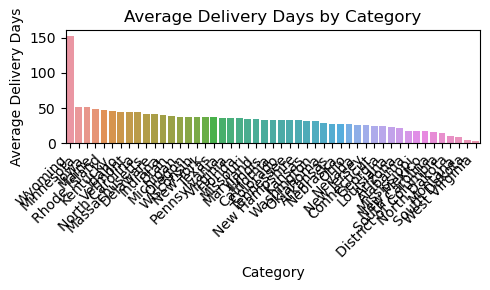

In [79]:
plt.figure(figsize=(5, 3))
sns.barplot(x=Average_delivery_Days.index, y=Average_delivery_Days.values)
plt.title('Average Delivery Days by Category')
plt.xlabel('Category')
plt.ylabel('Average Delivery Days')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [80]:
#3. What was the average delivery days for each segment?
segment = data.groupby("Segment")
Segment = segment["Average Delivery Days"].mean()
Average_Del_Seg = Segment.sort_values(ascending=False).dt.days
Average_Del_Seg

Segment
Corporate      35
Home Office    34
Consumer       34
Name: Average Delivery Days, dtype: int64

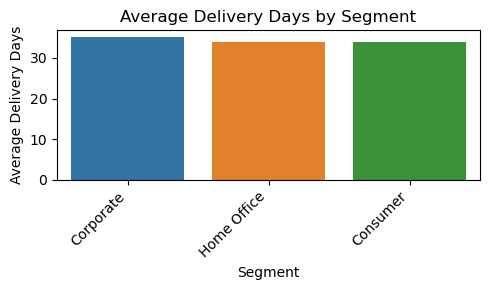

In [81]:
plt.figure(figsize=(5, 3))
sns.barplot(x=Average_Del_Seg.index, y=Average_Del_Seg.values)
plt.title('Average Delivery Days by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Delivery Days')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [82]:
#4. What were the 5 fastest delivery products?
data["Days"] = data["Average Delivery Days"].dt.days
product = data.groupby("Product Name")
result = product["Days"].sum()
result_sorted = result.sort_values()
result_sorted.head(5)

Product Name
RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting    0
Xerox 1989                                                                   0
Avery 482                                                                    0
Logitech Illuminated Ultrathin Keyboard with Backlighting                    0
Avery 484                                                                    0
Name: Days, dtype: int64

In [83]:
#5. What were the 5 slowest delivery products?
Product = data.groupby("Product Name")
result = Product["Days"].sum()
result_sorted = result.sort_values(ascending=False)
result_sorted.head(5)

Product Name
Easy-staple paper                           2212
Staples                                     1682
Staple envelope                             1444
Acco Perma 4000 Stacking Storage Drawers     954
Adjustable Depth Letter/Legal Cart           921
Name: Days, dtype: int64

In [84]:
Yes_count = (data['Returned'] == 'Yes').sum()
Yes_count

800

In [85]:
total_returns = len(data)
total_returns

9994

In [86]:
return_rate = (Yes_count/total_returns)*100
return_rate

8.004802881729036

In [87]:
data['Return_Rate'] = return_rate
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit,Average Delivery Days,Days,Return_Rate
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136,92 days,92,8.004803
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820,92 days,92,8.004803
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714,0 days,0,8.004803
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310,0 days,0,8.004803
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164,0 days,0,8.004803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,Not,25.2480,3,0.20,4.1028,2 days,2,8.004803
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.9600,2,0.00,15.6332,5 days,5,8.004803
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,Yes,258.5760,2,0.20,19.3932,5 days,5,8.004803
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.6000,4,0.00,13.3200,5 days,5,8.004803


In [88]:
#6.Which salesperson had the lowest return rate?
salesperson = data.groupby("Retail Sales People")
result = salesperson["Return_Rate"].sum()
result_sorted = result.sort_values(ascending=True)
result_sorted.head(1)

Retail Sales People
Cassandra Brandow    12967.780668
Name: Return_Rate, dtype: float64

In [89]:
ship_mode = data['Ship Mode'].value_counts()
ship_mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

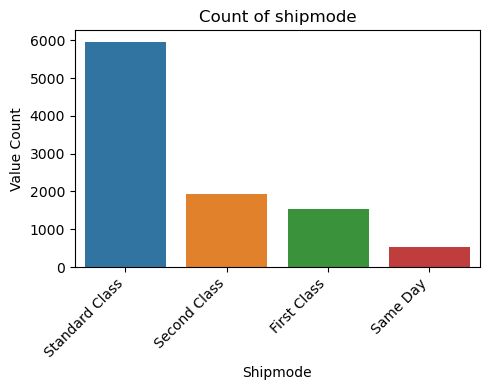

In [90]:
plt.figure(figsize=(5, 4))
sns.barplot(x=ship_mode.index, y=ship_mode.values)
plt.title('Count of shipmode')
plt.xlabel('Shipmode')
plt.ylabel('Value Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [91]:
#8.Which ship mode had the highest return rate?
shipmode = data.groupby("Ship Mode")
result = shipmode["Return_Rate"].sum()
result_sorted = result.sort_values(ascending=False)
result_sorted.head(1)


Ship Mode
Standard Class    47772.663598
Name: Return_Rate, dtype: float64

In [92]:
#8.Which ship mode had the lowest return rate?
shipmode = data.groupby("Ship Mode")
result = shipmode["Return_Rate"].sum()
result_sorted = result.sort_values(ascending=True)
result_sorted.head(1)

Ship Mode
Same Day    4346.607965
Name: Return_Rate, dtype: float64

In [93]:
#9.Which top 5 customers made the most profit?
Customer = data.groupby("Customer Name")
result = Customer["Profit"].sum()
top_5_customers = result.sort_values(ascending=False)
top_5_customer = top_5_customers.head(5)

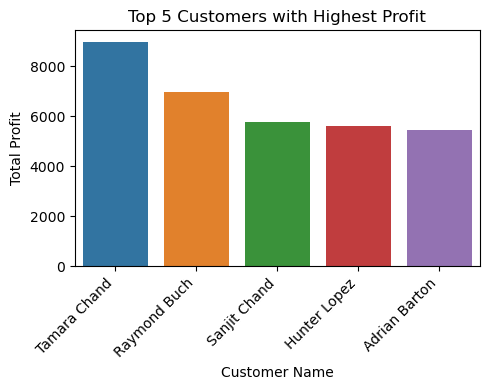

In [94]:
plt.figure(figsize=(5, 4))
sns.barplot(x=top_5_customer.index, y=top_5_customer.values)
plt.title('Top 5 Customers with Highest Profit')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [95]:
#10. Total Sales by sub category
Sub_Category = data.groupby("Sub-Category")
sales = Sub_Category["Sales"].sum()
Sub_Category_sales = sales.sort_values(ascending=False)
Sub_Category_sales

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

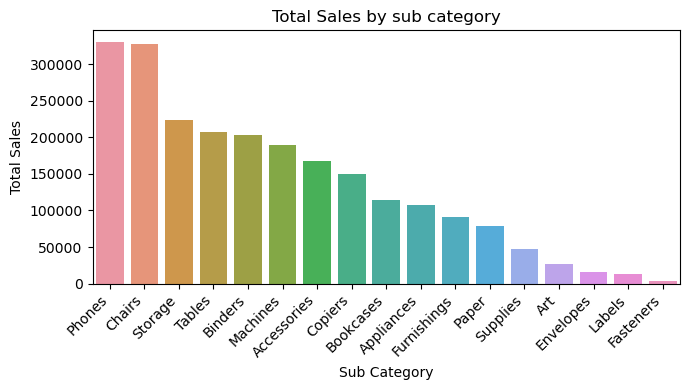

In [96]:
plt.figure(figsize=(7, 4))
sns.barplot(x=Sub_Category_sales.index, y=Sub_Category_sales.values)
plt.title('Total Sales by sub category')
plt.xlabel('Sub Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [97]:
data['Order Date'] = pd.to_datetime(data['Order Date']) 
data['Year'] = data['Order Date'].dt.year
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Returned,Sales,Quantity,Discount,Profit,Average Delivery Days,Days,Return_Rate,Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136,92 days,92,8.004803,2016
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820,92 days,92,8.004803,2016
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714,0 days,0,8.004803,2016
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310,0 days,0,8.004803,2015
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164,0 days,0,8.004803,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Ultra Door Pull Handle,Not,25.2480,3,0.20,4.1028,2 days,2,8.004803,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.9600,2,0.00,15.6332,5 days,5,8.004803,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Aastra 57i VoIP phone,Yes,258.5760,2,0.20,19.3932,5 days,5,8.004803,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.6000,4,0.00,13.3200,5 days,5,8.004803,2017


In [98]:
#In which year the order was high
Year_order = data.groupby("Year")
year = Year_order["Order ID"].count()
Orders_by_year = year.sort_values(ascending=False)
Orders_by_year

Year
2017    3312
2016    2587
2015    2102
2014    1993
Name: Order ID, dtype: int64